<a href="https://colab.research.google.com/github/lynnlyn620/nyu-python-public-policy/blob/master/Homework_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Step 1. Load the datasets:
1. Cleaned 311 data that excludes records with invalid community districts. Shared with you on Google Drive as cleaned_311_data_revised.csv
2. NYC Open dataset that provides the total count of different types of homeless shelter buildings per community district.
Data source page where you can preview the data: https://data.cityofnewyork.us/Social-Services/Buildings-by-Borough-and-Community-District/3qem-6v3v/data
CSV data download link you can plug into the pd.read_csv() function: https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD

In [0]:
df_homeless_shelter = pd.read_csv('/content/drive/My Drive/Buildings_by_Borough_and_Community_District.csv', header='infer')

In [7]:
df_homeless_shelter.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
0,07/31/2018,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
1,07/31/2018,Bronx,202,NaN,1.0,NaN,NaN,3.0,NaN,6.0
2,07/31/2018,Bronx,203,NaN,2.0,5.0,NaN,5.0,2.0,9.0
3,07/31/2018,Bronx,204,NaN,NaN,2.0,NaN,18.0,NaN,14.0
4,07/31/2018,Bronx,205,NaN,2.0,3.0,NaN,12.0,NaN,5.0


Step 2. Filter the shelter count dataframe to only keep rows where the value in the 'Report Date' column is '09/30/2019'


In [0]:
filter_homeless_shelter = df_homeless_shelter[df_homeless_shelter['Report Date'] == '09/30/2019']

In [9]:
filter_homeless_shelter.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0


**Step 3**. Create a new column in the shelter count dataframe that calculates the sum of all the individual count columns: 'Adult Family Comm Hotel', 'Adult Family Shelter', 'Adult Shelter', 'Adult Shelter Comm Hotel', 'FWC Cluster', 'FWC Comm Hotel', 'FWC Shelter'

- Tip: There are multiple ways to add these columns together. With one approach, you may find that your total column contains NaN values. This is because many of the columns contains NaN/empty values. When you add a real number to a NaN, the sum will be NaN. To get around this, you will need to fill in all the NaN values with 0 instead. Use the `.fillna(0)` method on your shelter count dataframe.

In [10]:
filter_homeless_shelter = filter_homeless_shelter.fillna(0)
filter_homeless_shelter

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
624,09/30/2019,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0
625,09/30/2019,Bronx,202,0.0,1.0,0.0,0.0,2.0,0.0,5.0
626,09/30/2019,Bronx,203,0.0,3.0,6.0,0.0,3.0,2.0,9.0
627,09/30/2019,Bronx,204,0.0,0.0,2.0,1.0,14.0,0.0,15.0
628,09/30/2019,Bronx,205,0.0,1.0,3.0,0.0,12.0,0.0,5.0
629,09/30/2019,Bronx,206,0.0,1.0,2.0,1.0,3.0,0.0,19.0
630,09/30/2019,Bronx,207,0.0,1.0,5.0,0.0,4.0,0.0,3.0
631,09/30/2019,Bronx,208,0.0,0.0,0.0,0.0,0.0,0.0,1.0
632,09/30/2019,Bronx,209,0.0,0.0,1.0,0.0,5.0,0.0,2.0
633,09/30/2019,Bronx,210,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [0]:
filter_homeless_shelter['sum_of_individual_count'] = filter_homeless_shelter.apply(lambda row: row['Adult Family Comm Hotel'] + row['Adult Family Shelter'] + row['Adult Shelter'] + row['Adult Shelter Comm Hotel'] + row['FWC Cluster'] + row['FWC Comm Hotel'] + row['FWC Shelter'], axis=1)

In [12]:
filter_homeless_shelter

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,sum_of_individual_count
624,09/30/2019,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0,15.0
625,09/30/2019,Bronx,202,0.0,1.0,0.0,0.0,2.0,0.0,5.0,8.0
626,09/30/2019,Bronx,203,0.0,3.0,6.0,0.0,3.0,2.0,9.0,23.0
627,09/30/2019,Bronx,204,0.0,0.0,2.0,1.0,14.0,0.0,15.0,32.0
628,09/30/2019,Bronx,205,0.0,1.0,3.0,0.0,12.0,0.0,5.0,21.0
629,09/30/2019,Bronx,206,0.0,1.0,2.0,1.0,3.0,0.0,19.0,26.0
630,09/30/2019,Bronx,207,0.0,1.0,5.0,0.0,4.0,0.0,3.0,13.0
631,09/30/2019,Bronx,208,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
632,09/30/2019,Bronx,209,0.0,0.0,1.0,0.0,5.0,0.0,2.0,8.0
633,09/30/2019,Bronx,210,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0


**Step 4**. From the 311 dataset, create a subset of all the 311 requests 
where `complaint_type == 'Homeless Person Assistance'`

In [0]:
Homeless_person_assitance = df[df.complaint_type == 'Homeless Person Assistance']


**Step 5**. Group the 311 subset by 'borocd' to get the count of 'Homeless Person Assistance' requests per community district

In [14]:
count_homeless_person_assistance = Homeless_person_assitance.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(count_homeless_person_assistance))

66


In [0]:
valid_borocds = ['101','102','103','104','105','106','107','108','109','110','111','112','201','202','203','204','205','206','207','208','209','210','211','212','301','302','303','304','305','306','307','308','309','310','311','312','313','314','315','316','317','318','401','402','403','404','405','406','407','408','409','410','411','412','413','414','501','502','503']

In [0]:
def recode_borocd_counts(row):
  if row.community_board[0] != 'U':
    if 'MANHATTAN' in row.community_board:
      return '1' + row.community_board[0:2]
    elif 'BRONX' in row.community_board:
      return '2' + row.community_board[0:2]
    elif 'BROOKLYN' in row.community_board:
      return '3' + row.community_board[0:2]
    elif 'QUEENS' in row.community_board:
      return '4' + row.community_board[0:2]
    elif 'STATEN ISLAND' in row.community_board:
      return '5' + row.community_board[0:2]
  else:
    return 'Invalid borocd'

In [0]:
count_homeless_person_assistance['borocd'] = count_homeless_person_assistance.apply(recode_borocd_counts, axis=1)

In [18]:
count_homeless_person_assistance =count_homeless_person_assistance[count_homeless_person_assistance.borocd.isin(valid_borocds)]
print(len(count_homeless_person_assistance))
print(count_homeless_person_assistance.head())

59
    community_board  count_of_311_requests borocd
1          01 BRONX                    188    201
2       01 BROOKLYN                    338    301
3      01 MANHATTAN                    758    101
4         01 QUEENS                    254    401
5  01 STATEN ISLAND                     41    501


**Step 6**. Merge the homeless 311 request count table (from Step 5) with the shelter count table (from Step 3).
- Tip: Not all community districts have homeless facilities in them. Use a left join with the 311 complaints as the left table and shelter counts as the right table. After doing this, you should fill in the new NaNs with zeros using the `.fillna(0)` method on your dataframe.

In [0]:
filter_homeless_shelter['Community District'] = filter_homeless_shelter['Community District'].astype(int)
count_homeless_person_assistance['borocd'] = count_homeless_person_assistance['borocd'].astype(int)
merged_data = count_homeless_person_assistance.merge(filter_homeless_shelter, how='left', left_on='borocd', right_on='Community District')

In [0]:
merged_data = merged_data.fillna(0)
merged_data['sum_of_individual_count'] = merged_data.apply(lambda row: row['Adult Family Comm Hotel'] + row['Adult Family Shelter'] + row['Adult Shelter'] + row['Adult Shelter Comm Hotel'] + row['FWC Cluster'] + row['FWC Comm Hotel'] + row['FWC Shelter'], axis=1)

In [21]:
merged_data

,community_board,count_of_311_requests,borocd,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter,sum_of_individual_count
0,01 BRONX,188,201,09/30/2019,Bronx,201.0,0.0,1.0,2.0,0.0,4.0,1.0,7.0,15.0
1,01 BROOKLYN,338,301,09/30/2019,Brooklyn,301.0,0.0,1.0,5.0,0.0,0.0,1.0,0.0,7.0
2,01 MANHATTAN,758,101,09/30/2019,Manhattan,101.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,01 QUEENS,254,401,09/30/2019,Queens,401.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,5.0
4,01 STATEN ISLAND,41,501,09/30/2019,Staten Island,501.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,02 BRONX,40,202,09/30/2019,Bronx,202.0,0.0,1.0,0.0,0.0,2.0,0.0,5.0,8.0
6,02 BROOKLYN,414,302,09/30/2019,Brooklyn,302.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,5.0
7,02 MANHATTAN,965,102,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,02 QUEENS,200,402,09/30/2019,Queens,402.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,5.0
9,02 STATEN ISLAND,34,502,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Step 7**. Produce a scatter plot of the data using the `matplotlib` package. What is your initial impression on whether there is a correlation between number of shelters and count of 311 homeless service requests?

In [22]:
clean_data = merged_data[['borocd', 'Borough', 'count_of_311_requests', 'sum_of_individual_count']]
clean_data

,borocd,Borough,count_of_311_requests,sum_of_individual_count
0,201,Bronx,188,15.0
1,301,Brooklyn,338,7.0
2,101,Manhattan,758,1.0
3,401,Queens,254,5.0
4,501,Staten Island,41,1.0
5,202,Bronx,40,8.0
6,302,Brooklyn,414,5.0
7,102,0,965,0.0
8,402,Queens,200,5.0
9,502,0,34,0.0


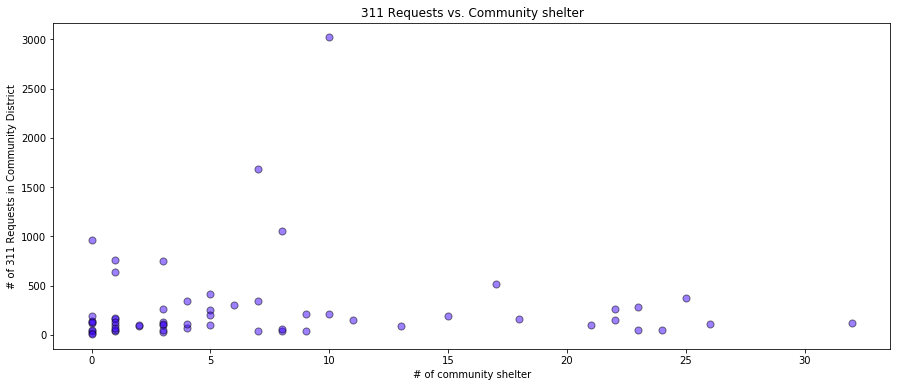

In [23]:
plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(clean_data['sum_of_individual_count']), # x
    np.array(clean_data.count_of_311_requests), # y
    s=50, # size of marker
    c='#3d03fc', # color hex color picker: https://www.google.com/search?q=color+picker
    edgecolors='black', # outline color of the marker
    alpha=0.5) # transparency. 0 is 100% transparent. 1 is 100% opaque

plt.title('311 Requests vs. Community shelter')
plt.xlabel('# of community shelter')
plt.ylabel('# of 311 Requests in Community District')

plt.show()

**Step 8**. Use `np.corrcoef(x, y)` to identify the correlation coefficient between count of total shelter buildings and count of homeless requests per community district.

In [24]:
x = np.array(clean_data['sum_of_individual_count'])
y = np.array(clean_data.count_of_311_requests)

np.corrcoef(x, y)

array([[1.        , 0.01073618],
       [0.01073618, 1.        ]])

Step 9. Perform a linear regression with count of total shelter buildings as the independent variable and count of homeless requests as the dependent variable

In [25]:
# y = dependent variable (# of 311 requests)
y = np.array(clean_data.count_of_311_requests)

# x = independent variable (population) with a constant added
x = np.array(clean_data['sum_of_individual_count'])
x = sm.add_constant(x)

print(x)

model = sm.OLS(y, x).fit()

# Print out the statistics

print(model.summary())

[[ 1. 15.]
 [ 1.  7.]
 [ 1.  1.]
 [ 1.  5.]
 [ 1.  1.]
 [ 1.  8.]
 [ 1.  5.]
 [ 1.  0.]
 [ 1.  5.]
 [ 1.  0.]
 [ 1. 23.]
 [ 1. 22.]
 [ 1. 17.]
 [ 1.  5.]
 [ 1.  0.]
 [ 1. 32.]
 [ 1. 10.]
 [ 1.  8.]
 [ 1.  3.]
 [ 1. 21.]
 [ 1. 18.]
 [ 1. 10.]
 [ 1.  0.]
 [ 1. 26.]
 [ 1.  4.]
 [ 1.  3.]
 [ 1.  0.]
 [ 1. 13.]
 [ 1.  9.]
 [ 1.  7.]
 [ 1.  3.]
 [ 1.  1.]
 [ 1. 11.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  8.]
 [ 1.  2.]
 [ 1.  6.]
 [ 1.  1.]
 [ 1.  3.]
 [ 1.  0.]
 [ 1. 23.]
 [ 1.  7.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1. 25.]
 [ 1.  0.]
 [ 1.  4.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1. 22.]
 [ 1.  1.]
 [ 1.  9.]
 [ 1.  1.]
 [ 1.  3.]
 [ 1.  1.]
 [ 1. 24.]
 [ 1.  4.]
 [ 1.  3.]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                  0.006571
Date:                Thu, 05 Dec 2

**Step 10**. Produce a scatter plot of the data with the line of best fit from your linear regression using the `matplotlib` package

In [26]:
p = model.params # intercept and coefficient
print('parameters:', p)

r2 = model.rsquared
print('R2:', r2)

parameters: [274.47717459   0.59920962]
R2: 0.00011526563489128172


In [27]:
label = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))
print(label)

y = 0.6x + 274.48; R2 = 0.0


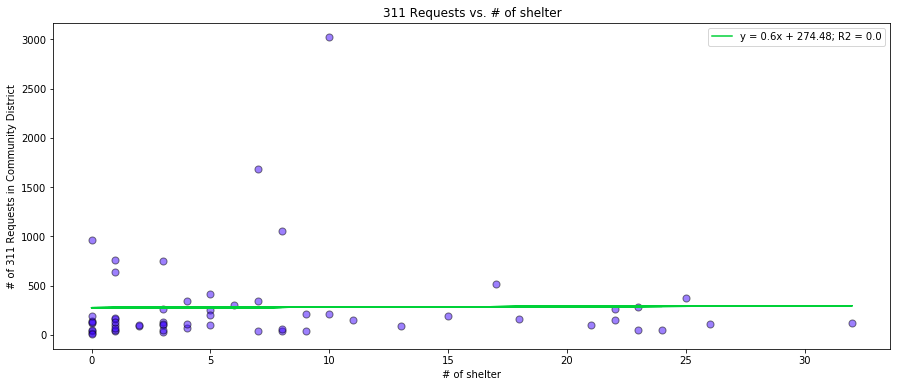

In [29]:
x_dummy = np.array(clean_data['sum_of_individual_count'])

plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(clean_data['sum_of_individual_count']), # x
    np.array(clean_data.count_of_311_requests), # y
    s=50, # size of marker
    c='#3d03fc', # color hex color picker: https://www.google.com/search?q=color+picker
    edgecolors='black', # outline color of the marker
    alpha=0.5) # transparency. 0 is 100% transparent. 1 is 100% opaque

# line of best fit, with y intercept
plt.plot(
    x_dummy, 
    p[0] + p[1] * x_dummy,
    c='#00d138', # lighter green
    label=label)

plt.title('311 Requests vs. # of shelter')
plt.xlabel('# of shelter')
plt.ylabel('# of 311 Requests in Community District')
plt.legend()

plt.show()

Step 11: Write a sentence or two explaining the results of your analysis. What do the numbers and chart tell you about the relationship between concentration of homeless shelters vs. frequency of 311 requests related to homelessness?

The linear regression shows that there is not a collinear relationship between the number of 311 requests and the total number of shelters in the community district. 